## Initial notebook 
to test methods to load/process audio data using torch and train models

In [3]:
# torch and torchaudio
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchaudio
import torchaudio.transforms as T

# other usefull imports
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display

### Download and load dataset

In [5]:
ds1 = torchaudio.datasets.DR_VCTK(
    root = "./datasets/", 
    subset = 'train', 
    download = True, 
    url = 'https://datashare.ed.ac.uk/bitstream/handle/10283/3038/DR-VCTK.zip',
)

ds2 = torchaudio.datasets.VCTK_092(
    root = "./datasets/", 
    download = True,
)

In [6]:
waveform_clean, sample_rate_clean, waveform_noisy, sample_rate_noisy, speaker_id, utterance_id, source, channel_id = ds1[0]
print(waveform_clean.shape)
display(Audio(waveform_clean.numpy()[0], rate=sample_rate_clean))

torch.Size([1, 34459])


torch.Size([1, 98473]) 48000 Please call Stella.



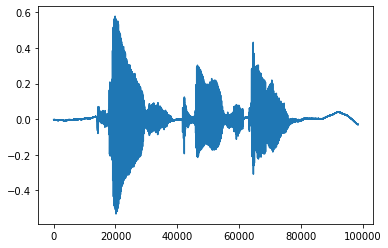

In [22]:
waveform, sample_rate, transcript, speaker_id, utterance_id = ds2[0]
print(waveform.shape, sample_rate, transcript)
display(Audio(waveform.numpy()[0], rate=sample_rate))
plt.plot(waveform[0]); plt.show()

In [23]:
spectrogram = T.Spectrogram(
    n_fft=1024,
    win_length=None,
    hop_length=512,
    center=True,
    pad_mode="reflect",
    power=2.0,
)

spec = spectrogram(waveform)

torch.Size([1, 513, 193])


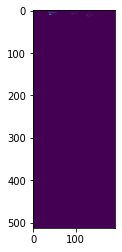

In [24]:
print(spec.shape)
plt.imshow(spec[0]); plt.show()

In [ ]:
waveform, sample_rate

In [12]:
l = []
for i, s in tqdm(enumerate(ds2)):
    if s[-1] == "001":
        print(i)

0it [00:00, ?it/s]

0
231
587
976
1342
1721
2118
2574
2985


KeyboardInterrupt: 

In [19]:
l = [
    "0",
"231",
"587",
"976",
"1342",
"1721",
"2118",
"2574",
"2985",
]

for i in l:
    waveform, sample_rate, transcript, speaker_id, utterance_id = ds2[int(i)]
    display(Audio(waveform.numpy()[0], rate=sample_rate))

In [15]:
waveform, sample_rate, transcript, speaker_id, utterance_id = ds2[2985]

In [40]:
cnn1 = nn.Conv2d(1, 64, (1,3), 1)
# pool1 = nn.MaxPool2d((, 2)
cnn2 = nn.Conv2d(64, 32, (1,3), 1)
# pool2 = nn.MaxPool2d(2, 2)
cnn3 = nn.Conv2d(32, 1, (1,1), 1)

In [41]:
d = torch.randn(1, 513, 1024)

In [46]:
d2 = cnn3(cnn2(cnn1(d))).permute(0,2,1)
d2.shape

torch.Size([1, 1020, 513])

In [51]:
transf_enc_layer = nn.TransformerEncoderLayer(d_model=513, nhead=3, batch_first=True)
transf_enc = nn.TransformerEncoder(
    encoder_layer=transf_enc_layer,
    num_layers=6,
)

In [58]:
transf_enc(d2[:,0,:]) == transf_enc(d2)[:,0,:]

tensor([[False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, F

In [54]:
transf_enc(d2[:,:10,:])

tensor([[[ 0.0718, -0.8104, -1.1806,  ...,  0.1966, -1.0313,  0.7944],
         [ 0.2134, -0.3664, -0.9798,  ...,  0.4974, -1.2206,  0.0821],
         [ 0.3034,  0.4386, -0.8017,  ...,  0.7131, -1.0573,  0.3686],
         ...,
         [ 0.9939, -0.1756,  0.1601,  ...,  0.9202, -0.5106,  1.1081],
         [ 0.9094, -0.1850, -0.5858,  ...,  0.7389, -1.0320,  0.6018],
         [ 0.9021,  0.2304, -1.0131,  ...,  0.3073, -0.5032,  1.2379]]],
       grad_fn=<NativeLayerNormBackward0>)

In [55]:
transf_enc(d2)[:,:10,:]

tensor([[[-0.5039,  0.6643, -1.1799,  ..., -0.1621, -0.7973,  0.7742],
         [-0.4710,  1.1506, -1.4896,  ..., -0.5417, -0.8409, -0.5283],
         [ 0.2829,  1.7759, -1.1067,  ..., -0.2476, -0.5620,  0.2658],
         ...,
         [ 0.4770,  1.1115,  0.9141,  ..., -0.1825, -0.1077,  1.0980],
         [ 1.0861,  1.5644, -0.6076,  ..., -0.0563,  0.0503,  0.4955],
         [ 0.7616,  1.3615, -1.0447,  ..., -0.9005,  0.1190,  0.7648]]],
       grad_fn=<SliceBackward0>)